\section{Unsupervized Analysis of Days of Week}
Treating crossings each day as features to learn about the relationships between various days.

In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
from jupyterworkflow.data import get_fremont_data
from sklearn.decomposition import PCA

\section{Get Data}

In [2]:
data = get_fremont_data()

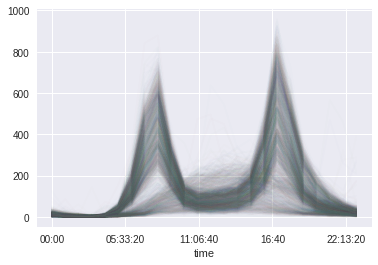

In [3]:
pivoted = data.pivot_table("Total", index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

\section{Principle component analysis}

In [4]:
x = pivoted.fillna(0).T.values
x.shape

(2159, 24)

In [5]:
x2 = PCA(2,  svd_solver='full').fit_transform(x)
x2.shape

(2159, 2)

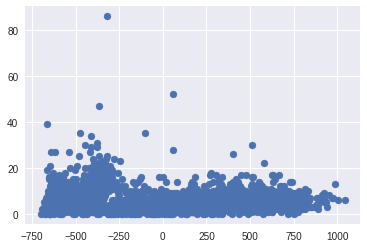

In [6]:
plt.scatter(x2[:,0], x[:,1])

\section{Unsupervised clustering}

In [7]:
gmm = GaussianMixture(2)
gmm.fit(x)
labels= gmm.predict(x)
labels

array([0, 0, 0, ..., 0, 0, 0])

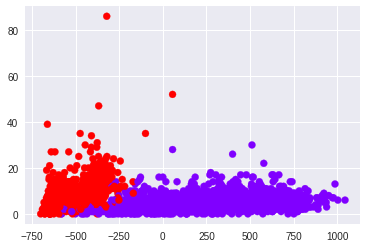

In [8]:
plt.scatter(x2[:,0], x[:,1], c=labels, cmap='rainbow')

(-31.85, 1000)

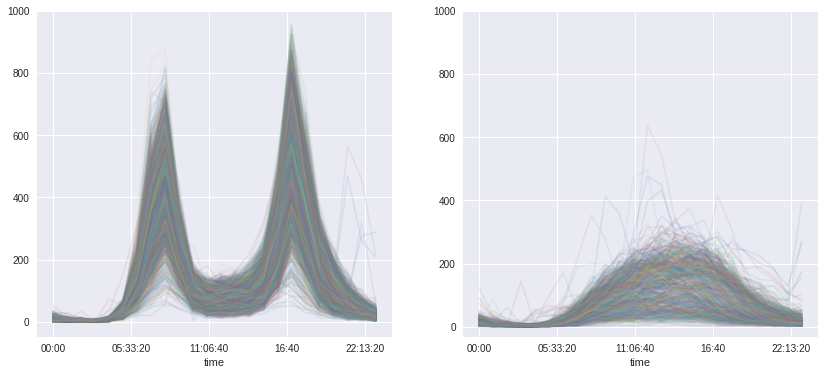

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);
ax[0].set_ylim(None, 1000)
ax[1].set_ylim(None, 1000)

\section{Comparing day of week}

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

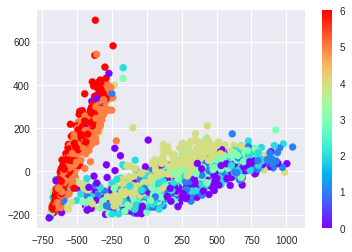

In [11]:
plt.scatter(x2[:, 0], x2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar();

\section{Analizing Outliers}

The fallowing points are weekdays iwth a holiday-like pattern

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-05-28', '2018-07-04'],
              dtype='datetime64[ns]', freq=None)

Feb 6, 2017 buvo [pūga](http://www.seattleweatherblog.com/snow/biggest-february-snowstorm-generation-wallops-seattle/)